### Problem 1

In [32]:
using PyPlot
using Random
Random.seed!(1234)
function generate_n_randomnum(n)
    num = Float64[]
    while length(num) < n
        x = 10*rand()
        if (x<=2)||(x>=7)
            push!(num,x)
        end
        
    end
    return num
end
g = generate_n_randomnum(10)
g

10-element Vector{Float64}:
 8.942454282009884
 9.53124627284842
 7.955469475347194
 7.484150218874741
 7.279350012266056
 0.07448006132865004
 1.9937661409915552
 9.567409540049077
 9.96665291437684
 7.491940599574348

### Problem 2

In [33]:
function simulate_prob_complex(n)
    comp = 0
    for i in 1:n
        a = 4rand()-2
        b = 4rand()-2
        c = 4rand()-2
        if (b^2-4a*c) < 0
            comp += 1
        end
    end
    return comp/n
end
function simulate_normprob_complex(n)
    comp = 0
    x = 0
    y = 0.4
    for i in 1:n
        a = y*randn() + x
        b = y*randn() + x
        c = y*randn() + x
        if (b^2-4a*c) < 0
            comp += 1
        end
    end
    return comp/n
end
simulate_normprob_complex(1000000)
println("The probability of complex roots under uniform distribution is ", simulate_prob_complex(1000000))
println("The probability of complex roots under normal distribution is ", simulate_normprob_complex(1000000))

The probability of complex roots under uniform distribution is 0.372788
The probability of complex roots under normal distribution is 0.351555


### Problem 3

In [34]:
function simulate_unit_circle(n)
    m = 0
    for i in 1:n
        angle1 = 2π*rand()  # Random angle in radians
        x1 = cos(angle1)
        y1 = sin(angle1)

        angle2 = 2π*rand()  # Random angle in radians
        x2 = cos(angle2)
        y2 = sin(angle2)
    
        if sqrt((x2-x1)^2+(y2-y1)^2) > 1
            m += 1
        end
    end
    return m/n
end
simulate_unit_circle(10000)

0.6676

### Problem 4

In [35]:
function f(x)
    return 1/sqrt(2*(pi))*exp(-(x^2)/2)
end
function ProbG(L,R)
    n = 100000000
    m = 0
    for i in 1:n
        x = (L-R)*rand()+L
        y = rand()
        if y < f(x)
            m += 1
        end
    end
    return m/n*(R-L)
end
ProbG(0,2)

0.47726454

### Problem 5

The probability of exit in the middle is 0.6996


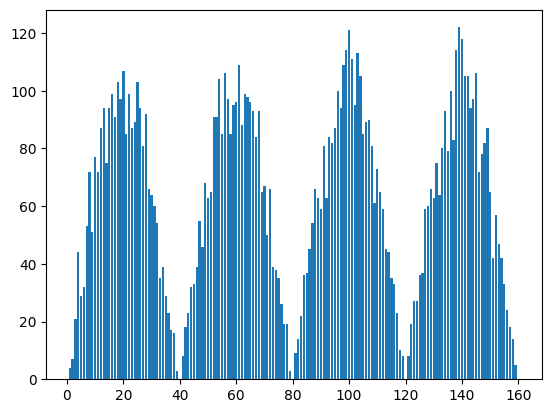

(PyObject <matplotlib.patches.Rectangle object at 0x7f025bd6d8d0>, PyObject <matplotlib.patches.Rectangle object at 0x7f025bd6d720>, PyObject <matplotlib.patches.Rectangle object at 0x7f025bd6dcf0>, PyObject <matplotlib.patches.Rectangle object at 0x7f025bd6df30>, PyObject <matplotlib.patches.Rectangle object at 0x7f025bd6e110>, PyObject <matplotlib.patches.Rectangle object at 0x7f025d7a8460>, PyObject <matplotlib.patches.Rectangle object at 0x7f025d73da20>, PyObject <matplotlib.patches.Rectangle object at 0x7f025bf492d0>, PyObject <matplotlib.patches.Rectangle object at 0x7f025bf49240>, PyObject <matplotlib.patches.Rectangle object at 0x7f025bd6e440>, PyObject <matplotlib.patches.Rectangle object at 0x7f025bd6e620>, PyObject <matplotlib.patches.Rectangle object at 0x7f025bd6e800>, PyObject <matplotlib.patches.Rectangle object at 0x7f025bd6e9e0>, PyObject <matplotlib.patches.Rectangle object at 0x7f025bd6ebc0>, PyObject <matplotlib.patches.Rectangle object at 0x7f025bd6eda0>, PyObject 

In [36]:
using PyPlot
function random_walk(n)
    x = [0]
    y = [0]
    while abs(x[end]) < n && abs(y[end]) < n
        if rand() < 0.5
            if rand() < 0.5  # Up
                push!(x, x[end])
                push!(y, y[end] + 1)
            else             # Down
                push!(x, x[end])
                push!(y, y[end] - 1)
            end
        else
            if rand() < 0.5  # Right
                push!(x, x[end] + 1)
                push!(y, y[end])
            else             # Left    
                push!(x, x[end] - 1)
                push!(y, y[end])
            end
        end
    end
    x,y
end    

function exit_middle(n,i) #We assume here that the middle part is [-10,10]
    m = 0
    for i in 1:i
        x,y = random_walk(n)
        if ((x[end] < 10) & (x[end] > -10)) | ((y[end]< 10)&(y[end] > -10))
            m += 1
        end
    end
    return m , i
end
#Here we simulate all possible end points and plot the frequency distribution
#Since the for edge are perfectly symmetric, we only need to look at one edge
function end_point(size,n) 
    count1 = zeros(8*size)
    for i in 1:n
        x,y = random_walk(size)
        x_end, y_end = x[end], y[end]
        if y_end == -size
            count1[x_end + size] += 1
        elseif y_end == size 
            count1[x_end + 3*size] += 1
        elseif x_end == -size
            count1[y_end + 5*size] += 1
        elseif x_end == size
            count1[y_end + 7*size] += 1
        end
    end
    return count1
end
n = 20
x = 10000
a,b = exit_middle(n,x)
println("The probability of exit in the middle is ", a/b)
b2 = bar(1:160,end_point(20,x))


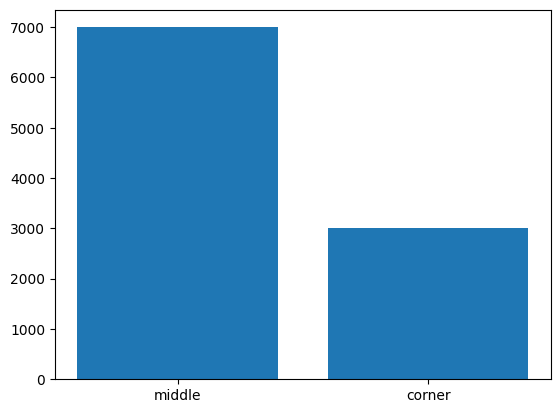

(PyObject <matplotlib.patches.Rectangle object at 0x7f025bc1b4f0>, PyObject <matplotlib.patches.Rectangle object at 0x7f025bc1b340>)

In [37]:
b1 = bar(["middle","corner"],[a,b-a]) 

### Problem 6

In [38]:
function card_rank(card)
    (card - 1) % 13 + 1
end
function card_suit(card)
    (card - 1) ÷ 13 + 1
end
function card_deck()
    cards = 1:52      # All cards
    return [card_rank.(cards) card_suit.(cards)]
end

function draw_card(n)
    cards = randperm(52)
    hand = cards[1:n]
    [card_rank.(hand) card_suit.(hand)]
end

function two_pairs(c)
    num = 0
    for i in 1:size(c,1)
        for j in i+1:size(c,1)
            if c[i,1] == c[j,1]
                num += 1
            end
        end
    end
    if num == 2
        return true
    else
        return false
    end
end

function two_pair_prob(n)
    m = 0
    for i in 1:n
        c = draw_card(5)
        if two_pairs(c)
            m += 1
        end
    end
    return m/n
end
two_pair_prob(1000000)

0.047681

### Problem 7(a)

In [39]:
A = reshape((-22:22) .% 11, 9, 5) # For testing

9×5 Matrix{Int64}:
   0   -2  -4   5   3
 -10   -1  -3   6   4
  -9    0  -2   7   5
  -8  -10  -1   8   6
  -7   -9   0   9   7
  -6   -8   1  10   8
  -5   -7   2   0   9
  -4   -6   3   1  10
  -3   -5   4   2   0

In [40]:
length(A[findall(x -> (x^2 < 10),A)])

17

### Problem 7(b)

In [41]:
A[:,findall(x -> x>=0,A[1,:])]

9×3 Matrix{Int64}:
   0   5   3
 -10   6   4
  -9   7   5
  -8   8   6
  -7   9   7
  -6  10   8
  -5   0   9
  -4   1  10
  -3   2   0

### Problem 7(c)

In [42]:
Int.(A .* (3 .^ (-((A .^ 2).^(1/2).%2).+1)))

9×5 Matrix{Int64}:
   0   -6  -12   5   3
 -30   -1   -3  18  12
  -9    0   -6   7   5
 -24  -30   -1  24  18
  -7   -9    0   9   7
 -18  -24    1  30  24
  -5   -7    6   0   9
 -12  -18    3   1  30
  -3   -5   12   6   0